In [12]:
#Cherenkov histogram with curve option
import pandas as pd
import numpy as np

# Read the CSV into a pandas DataFrame


def process_cherenkov_hits(csv_path):
    hits = pd.read_csv(csv_path)
    R_E = 6371000  # Earth's radius in meters
    w = np.array(hits["wavelength_nm"])
    t = np.array(hits["time_ns"])
    H = np.array(hits["z_production_m"]) - R_E
    x_c = np.array(hits["x_m"])
    y_c = np.array(hits["y_m"])
    r_c = np.sqrt(x_c**2 + y_c**2)
    z_c = np.array(hits["z_m"])
    dir_x = np.array(hits["dir_x"])
    dir_y = np.array(hits["dir_y"])
    dir_z = np.array(hits["dir_z"])
    weight = np.array(hits["weight"])  # <-- ADD THIS
    n_minus_1 = np.array(hits["n_minus_1"])  # <-- ADD THIS
    path = np.array(hits["path_length_m"])  # <-- ADD THIS
    dir_ground_x = np.array(hits["dir_ground_x"])
    dir_ground_y = np.array(hits["dir_ground_y"])
    dir_ground_z = np.array(hits["dir_ground_z"])
    emission_angle = np.degrees(np.arccos(-dir_ground_z))
    arrival_angle = np.degrees(np.arccos(dir_z))
    return hits, w, t, H, x_c, y_c, r_c, z_c, dir_x, dir_y, dir_z, weight, n_minus_1, path, dir_ground_x, dir_ground_y, dir_ground_z, emission_angle, arrival_angle




In [ ]:
# Path to your Cherenkov hits CSV file
csv_path = "/uufs/chpc.utah.edu/common/home/u1520754/corsika8_output_3/cherenkov_hits.csv"
hits, w, t, H, x_c, y_c, r_c, z_c, dir_x, dir_y, dir_z, weight, n_minus_1, path, dir_ground_x, dir_ground_y, dir_ground_z, emission_angle, arrival_angle = process_cherenkov_hits(csv_path)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# Assuming your DataFrame from the previous cell is called `hits`
# and has columns named "x" and "y"
theta_z = np.degrees(np.arccos(dir_z))
plt.figure(figsize=(6, 5))

h = plt.hist2d(
    x_c,
    y_c,
    bins=100,          # adjust binning as needed
    cmap="viridis",
    #range=[[-15, 15], [-15, 15]],
    #range=[[-5, 5], [-5, 5]],
    weights=weight,
    norm=LogNorm()  # use logarithmic color scale
)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Cherenkov Hits: 2D Histogram (x vs y)")
plt.colorbar(h[3], label="Counts")
plt.tight_layout()
plt.show()
np.sum(h[0])
print(np.nanmean(theta_z))

In [1]:
#Read the eventio file
from eventio import IACTFile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#input_file = "/uufs/chpc.utah.edu/common/home/u1520754/corsika_results/notch_h5.E5_r1500._Trinity/out_sib23d-pId6-En1.00E6-60./OUTPUT_1.00E6_6_60._102/telescope.dat"
#input_file='/uufs/chpc.utah.edu/common/home/u1520754/Detector_Sims/Test_Dir/CHASM/Tilt_91.560000/diffuse_BSM_1.000_E_8.000000_Ze_45.000000_Az_0.000000_0.dat'
def read_cherenkov_hits(input_file):
    def slant_depth(zem, obs_height, zenith_rad):
        theta = np.pi - zenith_rad
        beta = np.clip(np.arcsin((obs_height / zem) * np.sin(theta)), 0, np.pi/2)
        alpha = np.pi - theta - beta
        s = zem * np.sin(alpha) / np.sin(theta)
        return np.clip(s, 0, np.inf)

    with IACTFile(input_file) as f:
            events = iter(f)
            event = next(events)
            print(event.header)
            azimuth_rad = (event.header['azimuth']) #event azimuth
            zenith_rad = (event.header['zenith']) #event zenith
            X = event.photon_bunches[0]['x'] #in cm
            Y = event.photon_bunches[0]['y'] #in cm
            T = event.photon_bunches[0]['time'] #in ns
            cos_X = event.photon_bunches[0]['cx'] #cosine of the x direction
            cos_Y = event.photon_bunches[0]['cy'] #cosine of the y direction
            wavelength = event.photon_bunches[0]['wavelength'] #in nm
            zem = event.photon_bunches[0]['zem']  # in cm from Earth's surface to the photon emission point
            zem = zem * 1e-2   # Convert from cm to m
            #zem = zem -6371e3 # Convert to height above Earth's surface
            print("zenith", np.degrees(zenith_rad))
            print("azimuth", np.degrees(azimuth_rad))
            print("max zem", np.max(zem))
    Slant = slant_depth(zem+6371e3, 2944+6371e3, zenith_rad)  # Calculate slant depth
    Weight = np.ones(len(X))*5
    cos_Z = np.sqrt(1 - cos_X**2 - cos_Y**2)  # Calculate cosine of the z direction
    Theta_z = np.degrees(np.arccos(cos_Z))
    Phi = np.degrees(np.arctan2(cos_Y, cos_X))
    print(np.nanmean(Theta_z))
    print(np.nanmean(Phi))
    plt.figure(figsize=(6, 5))

    h = plt.hist2d(
        X/1e2,
        Y/1e2,
        bins=100,          # adjust binning as needed
        cmap="viridis",
        #range=[[-15, 15], [-15, 15]],
        #range=[[-5, 5], [-5, 5]],
        weights=Weight,
        norm=LogNorm()  # use logarithmic color scale
    )
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.title("Cherenkov Hits: 2D Histogram (x vs y)")
    plt.colorbar(h[3], label="Counts")
    plt.tight_layout()
    plt.show()
    return X, Y, T, cos_X, cos_Y, wavelength, zem, Theta_z, Phi, Slant, Weight


/uufs/chpc.utah.edu/common/home/u1520754/miniconda3/envs/jupyter_env/lib/python3.9/site-packages/corsikaio/subblocks/run_header.py:82: UserWarning: Version unknown, using run header definition dtype of version 7.x
  warnings.warn("Version unknown, using run header definition dtype of version 7.x")
/uufs/chpc.utah.edu/common/home/u1520754/miniconda3/envs/jupyter_env/lib/python3.9/site-packages/corsikaio/subblocks/event_header.py:138: UserWarning: Version unknown, using event header dtype definition of version 7.7XXX
  warnings.warn("Version unknown, using event header dtype definition of version 7.7XXX")


(b'EVTH', 1.0, 6.0, 1000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.553343, 4.712389, 0.0, [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0

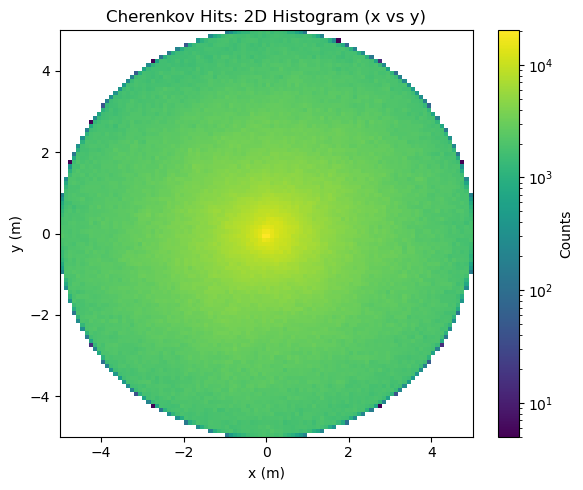

(b'EVTH', 1.0, 6.0, 1000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.553343, 4.712389, 0.0, [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0

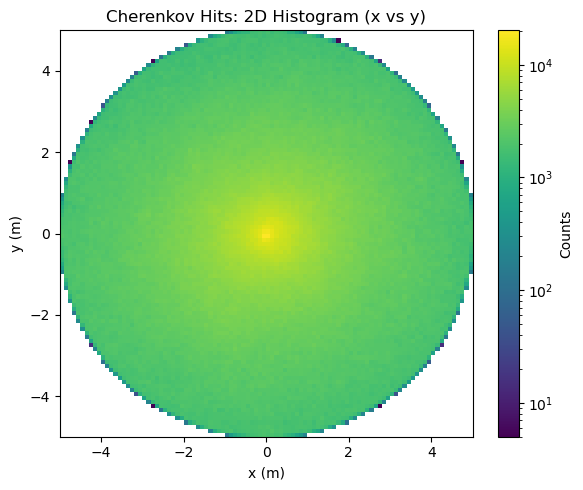

(b'EVTH', 1.0, 6.0, 1000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.553343, 4.712389, 0.0, [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0

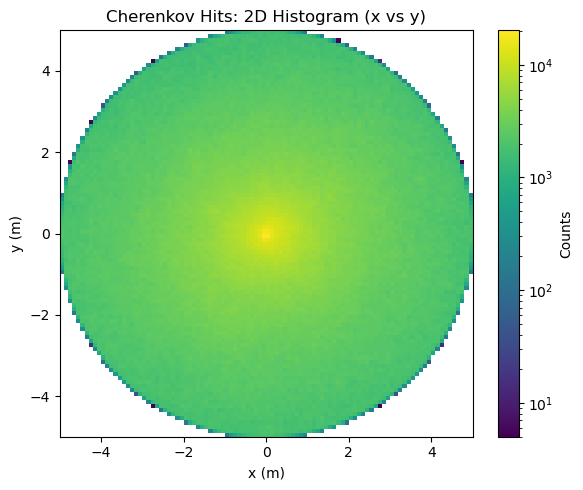

(b'EVTH', 1.0, 6.0, 100000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.553343, 4.712389, 0.0, [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.

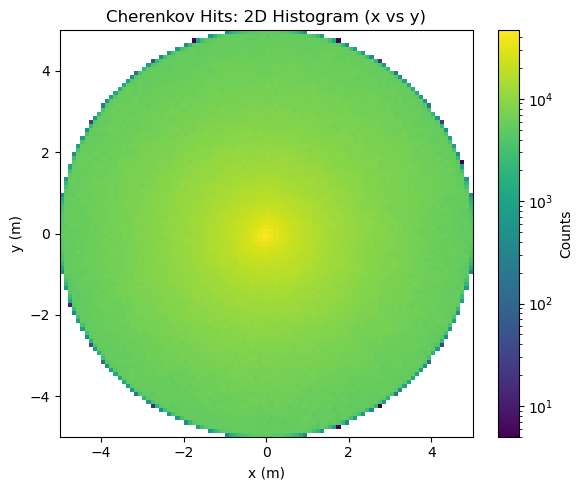

In [2]:
input_file='/uufs/chpc.utah.edu/common/home/u1520754/corsika8_output/cherenkov_hits.dat'
input_file2='/uufs/chpc.utah.edu/common/home/u1520754/corsika8_output_2/cherenkov_hits.dat'
input_file3='/uufs/chpc.utah.edu/common/home/u1520754/corsika8_output_3/cherenkov_hits.dat'
input_file4='/uufs/chpc.utah.edu/common/home/u1520754/corsika8_output_4/cherenkov_hits.dat'
X, Y, T, cos_X, cos_Y, wavelength, zem, Theta_z, Phi, Slant, Weight = read_cherenkov_hits(input_file)
X2, Y2, T2, cos_X2, cos_Y2, wavelength2, zem2, Theta_z2, Phi2, Slant2, Weight2 = read_cherenkov_hits(input_file2)
X3, Y3, T3, cos_X3, cos_Y3, wavelength3, zem3, Theta_z3, Phi3, Slant3, Weight3 = read_cherenkov_hits(input_file3)
X4, Y4, T4, cos_X4, cos_Y4, wavelength4, zem4, Theta_z4, Phi4, Slant4, Weight4 = read_cherenkov_hits(input_file4)

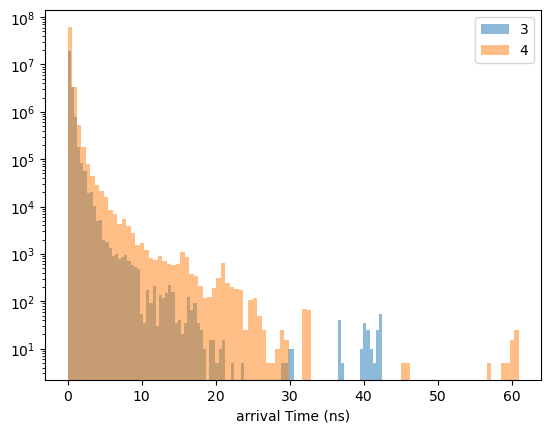

1228983.0 1228983.0 1228983.0 10553.137


In [3]:
t_min = min(T.min(), T2.min(), T3.min(), T4.min())
#plt.hist((T-t_min), bins=100, weights=Weight, label="1", alpha=0.5)
#plt.hist((T2-t_min), bins=100, weights=Weight2, label="2", alpha=0.5)
plt.hist((T3-T3.min()), bins=100, weights=Weight3, label="3", alpha=0.5)
plt.hist((T4-T4.min()), bins=100, weights=Weight4, label="4", alpha=0.5)
plt.xlabel("arrival Time (ns)")
plt.yscale("log")
plt.legend()
plt.show()
print(T.min(), T2.min(), T3.min(), T4.min())

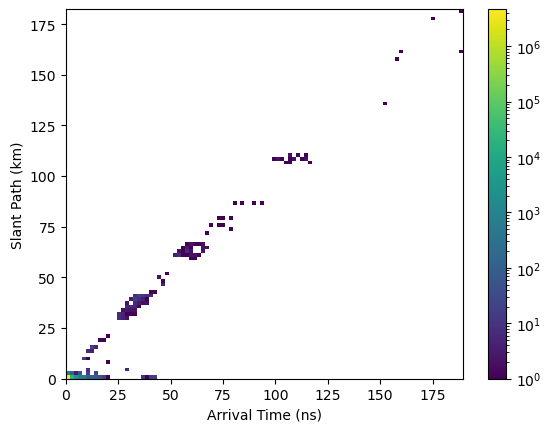

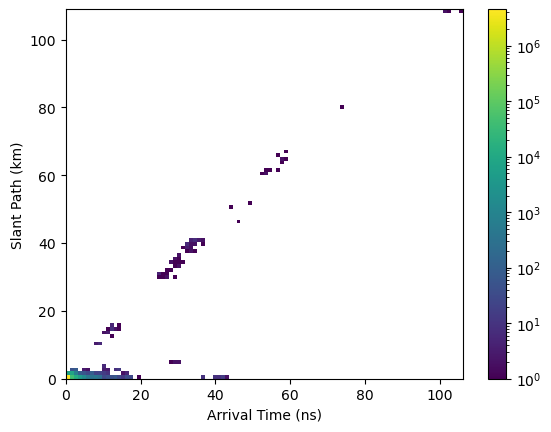

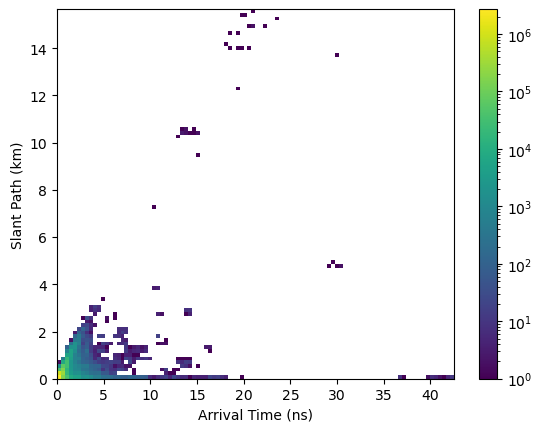

In [10]:
#plt.scatter(t-t.min(), path, c= theta_z, s =1)
plt.hist2d((T-t_min), Slant/1e3, bins=100, cmap="viridis", norm=LogNorm())
plt.ylabel("Slant Path (km)")
plt.xlabel("Arrival Time (ns)")
#plt.yscale("symlog")
plt.colorbar()
plt.show()
#plt.scatter(t-t.min(), path, c= theta_z, s =1)
plt.hist2d((T2-t_min), Slant2/1e3, bins=100, cmap="viridis", norm=LogNorm())
plt.ylabel("Slant Path (km)")
plt.xlabel("Arrival Time (ns)")
#plt.yscale("symlog")
plt.colorbar()
plt.show()
plt.hist2d((T3-t_min), Slant3/1e3, bins=100, cmap="viridis", norm=LogNorm())
plt.ylabel("Slant Path (km)")
plt.xlabel("Arrival Time (ns)")
#plt.yscale("symlog")
plt.colorbar()
plt.show()